### DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION #GRIPMAY21
## Author: Mansi Sharma
## TASK 4: Exploratory Data Analysis - Terrorism

Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
1. As a security/defense analyst, try to find out the hot zone of terrorism.
2. What all security issues and insights you can derive by EDA?

__Dataset__:__https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view?usp=sharing¶__

In [23]:
#Importing the Header Files
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [24]:
# reading the csv file
data = pd.read_csv("C:/Users/91962/Desktop/DB OF PLACEMENT DRIVES/resume/MY INTERNSHIP/SPARKS FOUNDATION/terror.csv",encoding='ISO-8859-1')
print("The dataset is loaded.")

C:\Users\91962\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


The dataset is loaded.


In [25]:
#printing head( first 5 rows) 
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [26]:
#to get rows and columns
data.shape

(181691, 135)

### DATA CLEANING 

In [27]:
#looking first in column labels.
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

__Many columns can be neglected for the calculations as have no use and others have to be renamed.__

In [39]:
data.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country','provstate':'State', 'city':'City', 'attacktype1_txt': 'Attacktype', 'targtype1_txt':'Targettype', 'targsubtype1_txt':'Targetsubtype', 'target1':'Target', 'weaptype1_txt':'Weapon', 'nkill':'kill', 'nwound':'Wound', 'gname':'Group', 'motive':'Motive', 'region_txt':'Region'}, inplace=True)

In [40]:
# deleting the unnecessary columns
df = data[['Year', 'Month', 'Day', 'Country','State', 'City', 'Attacktype', 'Targettype', 'Targetsubtype', 'Target', 'Weapon', 'kill', 'Wound', 'Group', 'Motive', 'Region']]

In [41]:
df.head(5).T

,0,1,2,3,4
Year,1970,1970,1970,1970,1970
Month,7,0,1,1,1
Day,2,0,0,0,0
Country,Dominican Republic,Mexico,Philippines,Greece,Japan
State,NaN,Federal,Tarlac,Attica,Fukouka
City,Santo Domingo,Mexico city,Unknown,Athens,Fukouka
Attacktype,Assassination,Hostage Taking (Kidnapping),Assassination,Bombing/Explosion,Facility/Infrastructure Attack
Targettype,Private Citizens & Property,Government (Diplomatic),Journalists & Media,Government (Diplomatic),Government (Diplomatic)
Targetsubtype,Named Civilian,"Diplomatic Personnel (outside of embassy, cons...",Radio Journalist/Staff/Facility,Embassy/Consulate,Embassy/Consulate
Target,Julio Guzman,"Nadine Chaval, daughter",Employee,U.S. Embassy,U.S. Consulate


In [42]:
#the total no of rows and columns
df.shape

(181691, 16)

In [43]:
#checking for any null values
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
State               421
City                434
Attacktype            0
Targettype            0
Targetsubtype     10373
Target              636
Weapon                0
kill              10313
Wound             16311
Group                 0
Motive           131130
Region                0
dtype: int64

In [44]:
df['City'] = df['City'].fillna(0)
df['State'] = df['State'].fillna(0)
df['Targetsubtype'] = df['Targetsubtype'].fillna(0)
df['Target'] = df['Target'].fillna(0)
df['Weapon'] = df['Weapon'].fillna(0)
df['kill']=df['kill'].fillna(0)
df['Wound']= df['Wound'].fillna(0)
df['Group']= df['Group'].fillna(0)
df['Motive']= df['Motive'].fillna(0)
df.isnull().sum()

<ipython-input-44-56b6acde8e38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['City'].fillna(0)
<ipython-input-44-56b6acde8e38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State'] = df['State'].fillna(0)
<ipython-input-44-56b6acde8e38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Year             0
Month            0
Day              0
Country          0
State            0
City             0
Attacktype       0
Targettype       0
Targetsubtype    0
Target           0
Weapon           0
kill             0
Wound            0
Group            0
Motive           0
Region           0
dtype: int64

__All missing values in "City", "Targetsubtype", "Target", "Weapon", "kill", "Wound", "Group" and "Motive" are filled now.__

## Exploratory Data Analysis

### Top Countries affected by Terror Attacks

In [52]:
print("Country with the most attacks:\n",df['Country'].value_counts().head(10))

Country with the most attacks:
 Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64


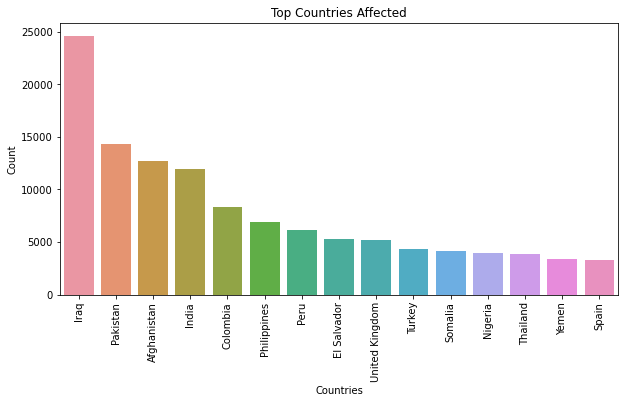

In [58]:
plt.figure(figsize = (10,5))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

__Iraq is most attacked country__

### States with most Terrorist Attack

In [59]:
print('State with the most attacks:\n',df['State'].value_counts().head(10))

State with the most attacks:
 Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64


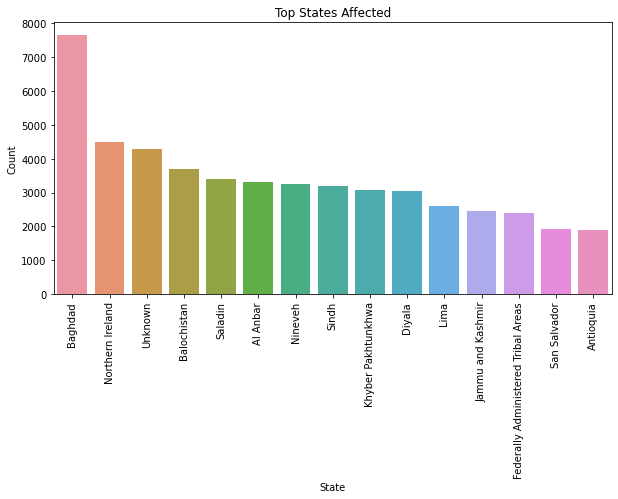

In [61]:
plt.figure(figsize = (10,5))
sns.barplot(df['State'].value_counts()[:15].index,df['State'].value_counts()[:15].values)
plt.title('Top States Affected')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

__Most affected state is Baghdad__

## Regions with most Terrorist Attacks

In [50]:
print("Region with the most attacks: \n",df['Region'].value_counts())


Region with the most attacks: 
 Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64


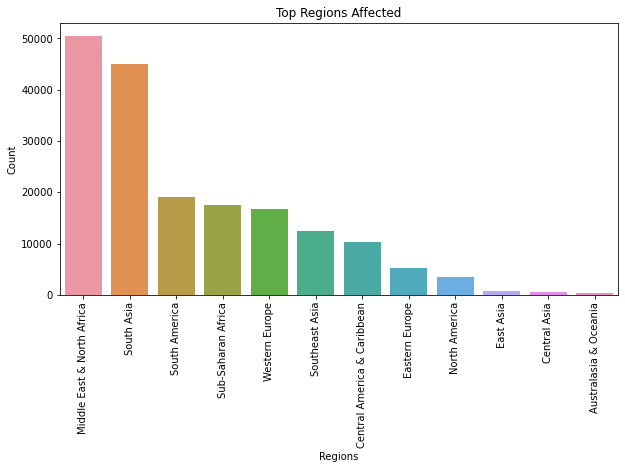

In [65]:
plt.figure(figsize = (10,5))
sns.barplot(df['Region'].value_counts()[:15].index,df['Region'].value_counts()[:15].values)
plt.title('Top Regions Affected')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

__Therefore, the most affected region is Middle East & North Africa__

## Cities with most Terrorist Attacks

In [66]:
print("Cities with the most attacks: \n",df['City'].value_counts().head(10))

Cities with the most attacks: 
 Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64


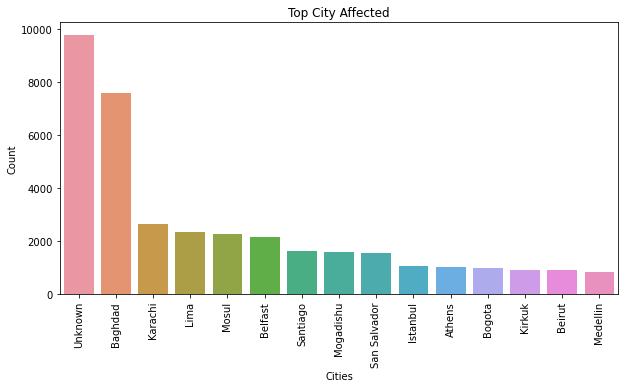

In [67]:
plt.figure(figsize = (10,5))
sns.barplot(df['City'].value_counts()[:15].index,df['City'].value_counts()[:15].values)
plt.title('Top City Affected')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

__City with most attacks is baghdad since the first is unknown__

## Years,Months and Day with most Terrorist Activity

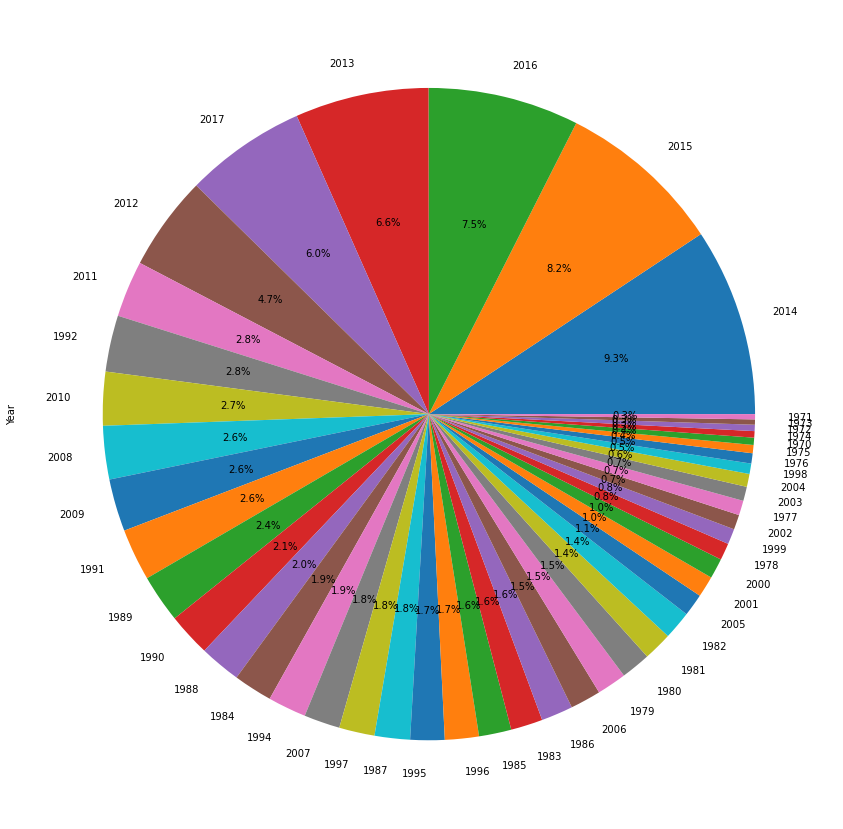

In [73]:
plt.figure(figsize=(25,15))
df['Year'].value_counts().plot(kind='pie', autopct="%.1f%%")
plt.show()

__It can be seen here that most of the attacks were carried out in 2014.__

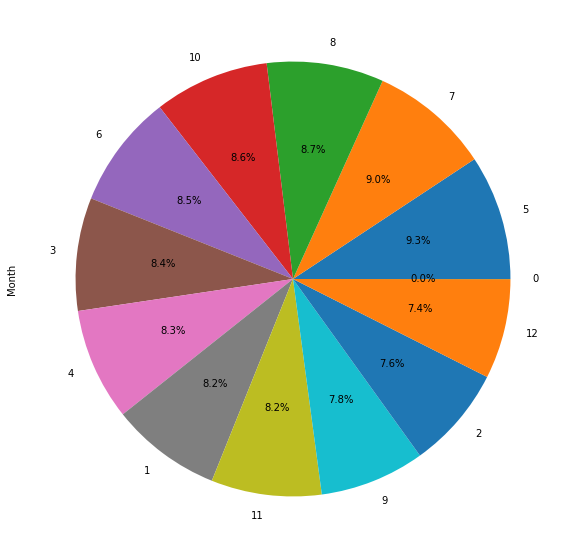

In [74]:
plt.figure(figsize=(10,10))
df['Month'].value_counts().plot(kind='pie', autopct="%.1f%%")
plt.show()

__Most of attacks take place in May and least in November.__

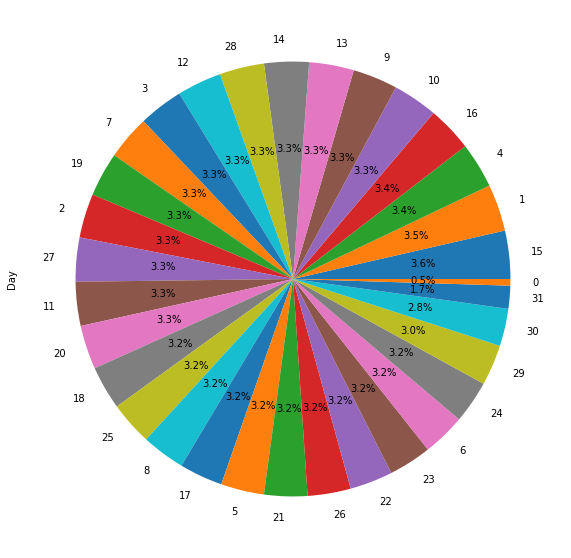

In [75]:
plt.figure(figsize=(10,10))
df['Day'].value_counts().plot(kind='pie', autopct="%.1f%%")
plt.show()

__Most terrorist attacks take place on the 15th and least on the 31st day of the month__

## Most Frequent Attack Type

Most Frequent Attack Types:
 Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attacktype, dtype: int64


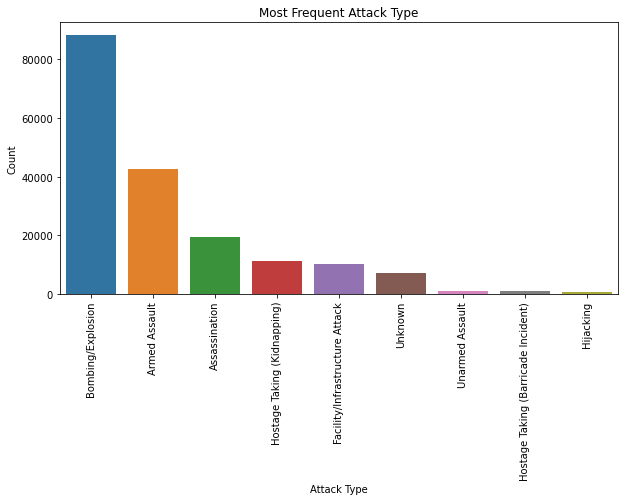

In [82]:
print("Most Frequent Attack Types:\n",df['Attacktype'].value_counts())

plt.figure(figsize = (10,5))
sns.barplot(df['Attacktype'].value_counts()[:15].index,df['Attacktype'].value_counts()[:15].values)
plt.title('Most Frequent Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

__Most frequent Attack Type is Bombing / Explosion.__

## Analysis of Different categories invovled in past terrorist activity

Group with the most attacks:
 Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Group, dtype: int64


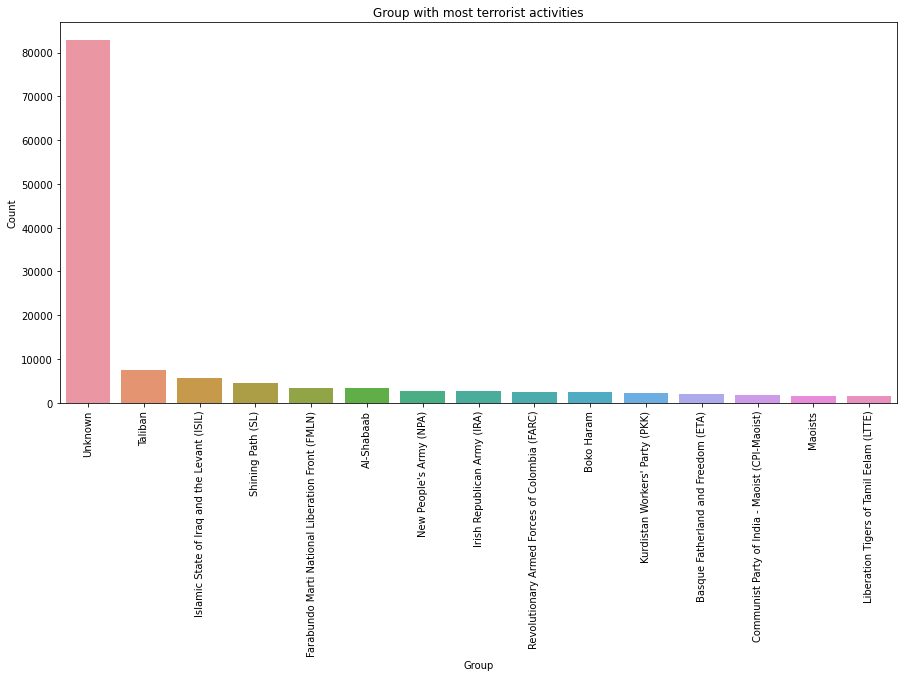

In [83]:
print("Group with the most attacks:\n",df['Group'].value_counts().head())

plt.figure(figsize = (15,7))
sns.barplot(df['Group'].value_counts()[:15].index,df['Group'].value_counts()[:15].values)
plt.title('Group with most terrorist activities')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

__The most frequent group in past terror attacks is taliban since the first is unknown__

Most popular Weapon Type :
 Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: Weapon, dtype: int64


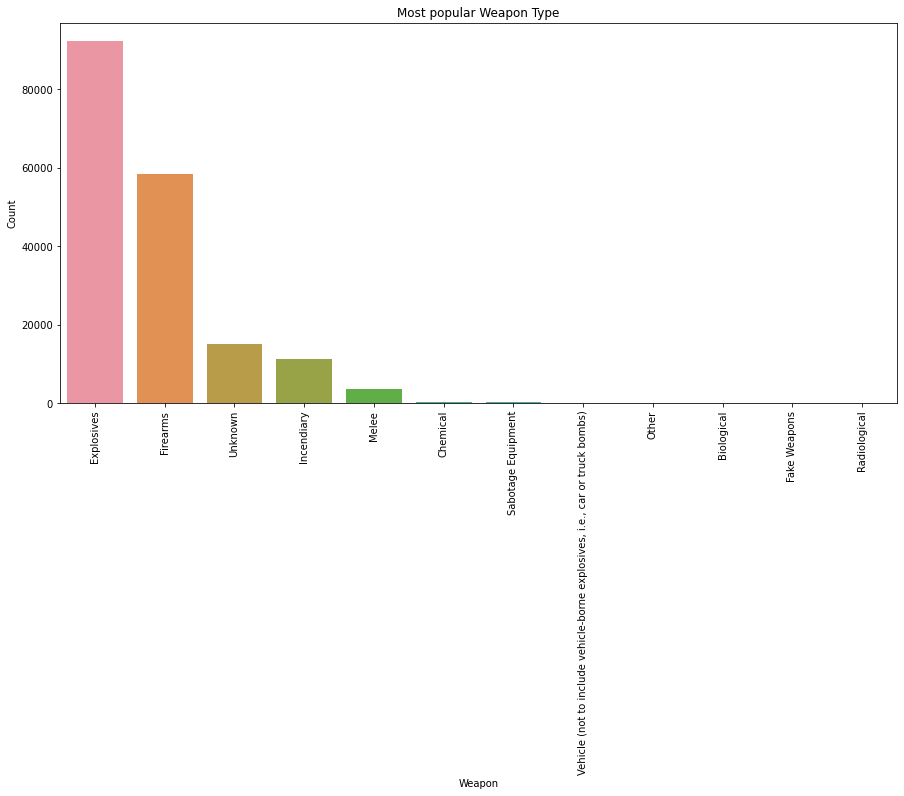

In [85]:
print("Most popular Weapon Type :\n",df['Weapon'].value_counts().head())

plt.figure(figsize = (15,7))
sns.barplot(df['Weapon'].value_counts()[:15].index,df['Weapon'].value_counts()[:15].values)
plt.title('Most popular Weapon Type')
plt.xlabel('Weapon')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

__Attacks most often take place with the help of "explosives" and "firearms". Especially rarely with the help of "Fake Weapons", "Radiological" and "Biological" weapons.__

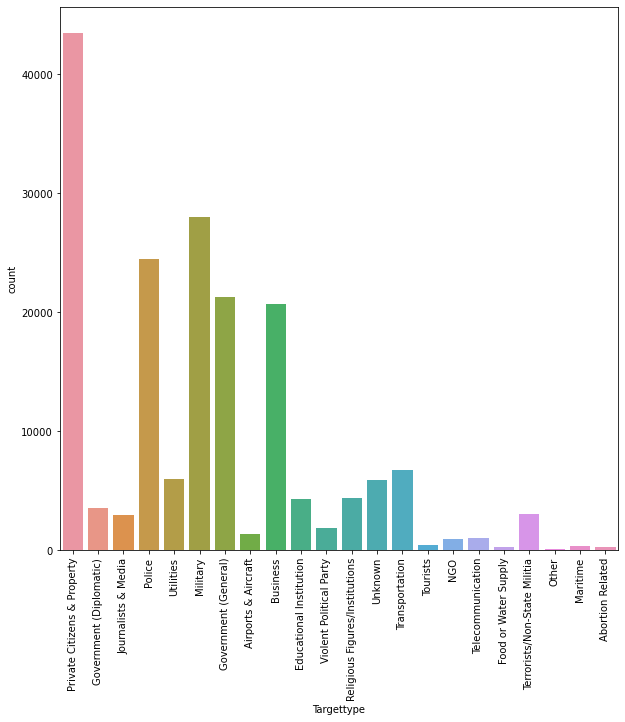

In [86]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['Targettype'])
plt.xticks(rotation=90)
plt.show()


__Most target types are "Private Citizens & Property", "Military", "Police", "Government" and "Businesses", the rarest are for example "Abortion Related".__

In [89]:
dftop10_target = df['Target'].value_counts()[:10]

print(dftop10_target)


Civilians        6461
Unknown          5918
Soldiers         3157
Patrol           2942
Checkpoint       2905
Vehicle          2785
Officers         1787
Village          1679
Military Unit    1533
Bus              1335
Name: Target, dtype: int64


__Even looking at the target, it can be seen that Civilians and Soldiers are most affected.__

### Killed vs Wounded Visualization

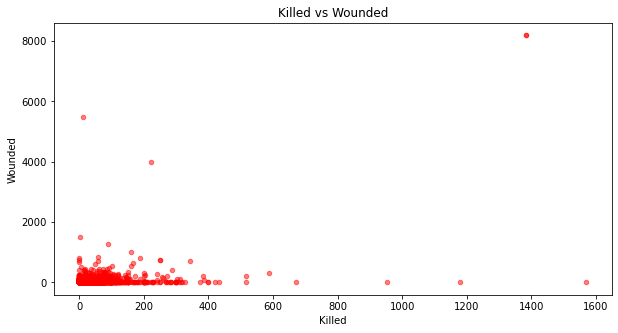

In [93]:
df.plot(kind = 'scatter', x = 'kill', y = 'Wound', alpha = 0.5, color = 'red', figsize = (10,5))
plt.xlabel('Killed')
plt.ylabel('Wounded')
plt.title('Killed vs Wounded')
plt.show()

__It can be seen that most often none, one, or two are killed.__

# Results

__1) Years with most attacks: 2014 (over 160.000), 2015 (round 150.000)__


__2 )Month with most attacks: May__


__3) Day with most attacks: 15th__


__4) Top 5 Countries with most attacks:
Iraq
Pakistan
Afghanistan
India
Columbia__


__5) Top 5 Cities with most attacks:
Baghdad
Karachi
Lima
Mosul
Belfast__


__6) Regions with most attacks: Middle East & North Africa, South Asia____


__7) Attack types: Bombing, Explosion, Armed Assault so people need to practice a little alertness in crowded places.__


__8) Top 5 Target types:
Private Citizens & Property
Military
Police
Government
Businesses
__
__9 )Weapons: Explosives, Firearms
__

__10 )Top 5 terrorist groups with most attacks:
Taliban
Islamic State of Iraq and the Levant
Shining Path
Farabundo Marti National Liberation Front
Al-Shabaab__